# Define parameters

In [1]:
from traffic_events import *

# ####################
# Defind parameters
# ####################

project_par = {
    'data_input_path'   :   '../Singapore_data/phase7/',
    'data_output_path'  :  './S16_dA_days',
    'fig_output_path'   :  './OutFigs',
    'stations'          :  {'S16':['1732']},
#     'stations'          :  {'S16':['2653']},#phase 1:1732; phase 2:2653
    'components'        :  ['Z'],
    
    'verbosity'         :  True,
    'local_timezone'    :  True,  # correct time zone to local time
#     'proj_time_bgn'     :  UTCDateTime(2020,4,19,0,0,0),   # section begin time
#     'proj_time_end'     :  UTCDateTime(2020,4,22,0,59,59), # section end time
    
}

processing_par = {

    # remove response
    'remove_response'   : False,
    'remove_singlef'    : False,
    
    # resampling
    'downsampling_rate' : 0.002,
    
    # highpass filter
    'freq_highpass'     : 0.1,

    # PSD
    'PSD_winlen'        : 24*3600, # second, time length for output PSD
    
    # identify footsteps
    'winlen_spc'        : 3600,  # sec, time window length for calculating spectrogram
    'winlen_events'     : 12*3600, # sec, time window length for counting events
    'sampleRate'        : 500,
    'notch_freq'        : 50,
    'qality_factor'     : 100,
    'sel_lfre'          : 30,
    'sel_hfre'          : 100,
    'prominence'        : 2,
    'distance'          : 5,
    'alp'               : 3,
    't_h'               : 12,
    'c0'                : 1,
    'd_ind'             : 5,
    'f_l'               : 10,
    'f_h'               : 40,
    'mu'                : 5,
    'std_h'             : 1.5,
    'vcar'              : 13.9,
    'vs'                : 120,
    'delta_t1'          : 3*3600,#19-7 p1,2 0*3600;p3new 20.5*3600;p4new 22*3600,p5 8*3600;p6,7 3*3600
    'delta_t2'          : 12*3600,
    'nfft'              : 256,
    'nperseg'           : 256,
    'noverlap'          : 128,
    'pk_pct'            : 0.8,
    }

# Select two amplitude spectrum at two times from each traffic signal event

In [16]:
# ######################
# Data processing flow
# ######################
%matplotlib inline


# initial DataProcessing class
dp = DataProcessing(project_par, processing_par, default_par)    

# get data list
dp.getdatalist()

for files in dp.data_list:
    
    dp.readdata(files)
    dp.preprocessing()
#     dp.high_pass()
    #dp.psd()
    dp.iso_traffic()
    
plt.close()   

>>> Create input data_list and station_list!
../Singapore_data/phase7/453001732..0.8.2020.10.06.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.3.2020.10.01.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.15.2020.10.13.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.7.2020.10.05.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.12.2020.10.10.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.11.2020.10.09.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.10.2020.10.08.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.18.2020.10.16.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.25.2020.10.23.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.26.2020.10.24.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.2.2020.09.30.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.5.2020.10.03.08.00.00.000.Z.sac
../Singapore_data/phase7/453001732..0.1.2020.09.29.13.31.40.000.Z.sac
../Singapore_data/phase7/453001732..0.

 >>> Read data from ../Singapore_data/phase7/453001732..0.16.2020.10.14.08.00.00.000.Z.sac
1 Trace(s) in Stream:
.3001732..Z | 2020-10-14T08:00:00.000000Z - 2020-10-15T08:00:00.005273Z | 500.0 Hz, 43200001 samples
 Pre-processing:  correct time-zone 
1 Trace(s) in Stream:
S16.3001732..Z | 2020-10-14T16:00:00.000000Z - 2020-10-15T16:00:00.005273Z | 500.0 Hz, 43200001 samples
 >>> Read data from ../Singapore_data/phase7/453001732..0.6.2020.10.04.08.00.00.000.Z.sac
1 Trace(s) in Stream:
.3001732..Z | 2020-10-04T08:00:00.000000Z - 2020-10-05T08:00:00.005273Z | 500.0 Hz, 43200001 samples
 Pre-processing:  correct time-zone 
1 Trace(s) in Stream:
S16.3001732..Z | 2020-10-04T16:00:00.000000Z - 2020-10-05T16:00:00.005273Z | 500.0 Hz, 43200001 samples
 >>> Read data from ../Singapore_data/phase7/453001732..0.23.2020.10.21.08.00.00.000.Z.sac
1 Trace(s) in Stream:
.3001732..Z | 2020-10-21T08:00:00.000000Z - 2020-10-22T08:00:00.005273Z | 500.0 Hz, 43200001 samples
 Pre-processing:  correct time-zo

# Q estimation

## Define data input, output path, and other parameters

In [2]:
from traffic_events import *
from matplotlib import colors
import matplotlib as mpl
from numpy import linalg as LA
import os


cmp='Z'
station = 'S16'
flag    = 'traffic'
flag_trace='trace'
flag_peaks='peaks'
flag_Q='Q'
flag_Ql='Ql'
flag_Qu='Qu'
flag_acp = 'accepted'

f_l=10 #lower frequency band of the data
f_h=40 #higher frequency band of the data

ax_f=np.load('ax_f.npy')
ia=int(np.where(ax_f>=f_l)[0][0])
ib=int(np.where(ax_f<=f_h)[0][-1])

# parameters for cleaning the data
ka_lpct=0.2 
ka_hpct=0.95
dy_pct=0.7

# use seismic data in 4-day long, 1-day moving window to estimate the daily Q
time_diff1   = 1*3600*24
time_diff2   = 4*3600*24

traffic_datapath = './S16_dA_days/'
data_output_path='./trace_S16_4days/'

for keys in [traffic_datapath, data_output_path] :
    if not os.path.exists(keys):
        print('creat %s' %keys)
        os.makedirs(keys)
        
starttime = UTCDateTime(2020,3,15,0,0,0)   # section begin time
endtime   = UTCDateTime(2020,11,10,0,0,0)   # section begin time

## Estimate Q statistically

traffic_list ./S16_dA_days/ S16 traffic 2020-03-15T00:00:00.000000Z 2020-03-19T00:00:00.000000Z Z
traffic_list ./S16_dA_days/ S16 traffic 2020-03-16T00:00:00.000000Z 2020-03-20T00:00:00.000000Z Z
traffic_list ./S16_dA_days/ S16 traffic 2020-03-17T00:00:00.000000Z 2020-03-21T00:00:00.000000Z Z
traffic_list ./S16_dA_days/ S16 traffic 2020-03-18T00:00:00.000000Z 2020-03-22T00:00:00.000000Z Z
traffic_list ./S16_dA_days/ S16 traffic 2020-03-19T00:00:00.000000Z 2020-03-23T00:00:00.000000Z Z
traffic_list ./S16_dA_days/ S16 traffic 2020-03-20T00:00:00.000000Z 2020-03-24T00:00:00.000000Z Z
traffic_list ./S16_dA_days/ S16 traffic 2020-03-21T00:00:00.000000Z 2020-03-25T00:00:00.000000Z Z
traffic_list ./S16_dA_days/ S16 traffic 2020-03-22T00:00:00.000000Z 2020-03-26T00:00:00.000000Z Z
traffic_list ./S16_dA_days/ S16 traffic 2020-03-23T00:00:00.000000Z 2020-03-27T00:00:00.000000Z Z
traffic_list ./S16_dA_days/ S16 traffic 2020-03-24T00:00:00.000000Z 2020-03-28T00:00:00.000000Z Z
traffic_list ./S16_d

0.110647397647 0.103342266796 0.117952528498
traffic_list ./S16_dA_days/ S16 traffic 2020-05-18T00:00:00.000000Z 2020-05-22T00:00:00.000000Z Z
0.110225852861 0.103443567902 0.117008137821
traffic_list ./S16_dA_days/ S16 traffic 2020-05-19T00:00:00.000000Z 2020-05-23T00:00:00.000000Z Z
0.114145426863 0.107356035441 0.120934818285
traffic_list ./S16_dA_days/ S16 traffic 2020-05-20T00:00:00.000000Z 2020-05-24T00:00:00.000000Z Z
0.113027898824 0.105987730895 0.120068066752
traffic_list ./S16_dA_days/ S16 traffic 2020-05-21T00:00:00.000000Z 2020-05-25T00:00:00.000000Z Z
0.112941220035 0.10590806276 0.119974377309
traffic_list ./S16_dA_days/ S16 traffic 2020-05-22T00:00:00.000000Z 2020-05-26T00:00:00.000000Z Z
0.112794237311 0.105612063683 0.119976410939
traffic_list ./S16_dA_days/ S16 traffic 2020-05-23T00:00:00.000000Z 2020-05-27T00:00:00.000000Z Z
0.117610897344 0.11024700356 0.124974791128
traffic_list ./S16_dA_days/ S16 traffic 2020-05-24T00:00:00.000000Z 2020-05-28T00:00:00.000000Z Z
0

0.104332143392 0.0974782817429 0.111186005041
traffic_list ./S16_dA_days/ S16 traffic 2020-07-15T00:00:00.000000Z 2020-07-19T00:00:00.000000Z Z
0.106330428944 0.0993888037869 0.113272054101
traffic_list ./S16_dA_days/ S16 traffic 2020-07-16T00:00:00.000000Z 2020-07-20T00:00:00.000000Z Z
0.107850987461 0.100795071814 0.114906903108
traffic_list ./S16_dA_days/ S16 traffic 2020-07-17T00:00:00.000000Z 2020-07-21T00:00:00.000000Z Z
0.114065018662 0.10714989204 0.120980145285
traffic_list ./S16_dA_days/ S16 traffic 2020-07-18T00:00:00.000000Z 2020-07-22T00:00:00.000000Z Z
0.116793274268 0.109822352593 0.123764195943
traffic_list ./S16_dA_days/ S16 traffic 2020-07-19T00:00:00.000000Z 2020-07-23T00:00:00.000000Z Z
0.121137404659 0.11402079344 0.128254015878
traffic_list ./S16_dA_days/ S16 traffic 2020-07-20T00:00:00.000000Z 2020-07-24T00:00:00.000000Z Z
0.122060798766 0.114967825937 0.129153771594
traffic_list ./S16_dA_days/ S16 traffic 2020-07-21T00:00:00.000000Z 2020-07-25T00:00:00.000000Z Z

0.116809765177 0.109734339665 0.12388519069
traffic_list ./S16_dA_days/ S16 traffic 2020-09-11T00:00:00.000000Z 2020-09-15T00:00:00.000000Z Z
0.117002248049 0.109876922369 0.124127573729
traffic_list ./S16_dA_days/ S16 traffic 2020-09-12T00:00:00.000000Z 2020-09-16T00:00:00.000000Z Z
0.114592734214 0.107513819233 0.121671649195
traffic_list ./S16_dA_days/ S16 traffic 2020-09-13T00:00:00.000000Z 2020-09-17T00:00:00.000000Z Z
0.114673111069 0.107464428121 0.121881794018
traffic_list ./S16_dA_days/ S16 traffic 2020-09-14T00:00:00.000000Z 2020-09-18T00:00:00.000000Z Z
0.113492955769 0.106376546736 0.120609364802
traffic_list ./S16_dA_days/ S16 traffic 2020-09-15T00:00:00.000000Z 2020-09-19T00:00:00.000000Z Z
0.11141315837 0.10451583921 0.118310477531
traffic_list ./S16_dA_days/ S16 traffic 2020-09-16T00:00:00.000000Z 2020-09-20T00:00:00.000000Z Z
0.113772781894 0.106867907007 0.120677656781
traffic_list ./S16_dA_days/ S16 traffic 2020-09-17T00:00:00.000000Z 2020-09-21T00:00:00.000000Z Z
0.

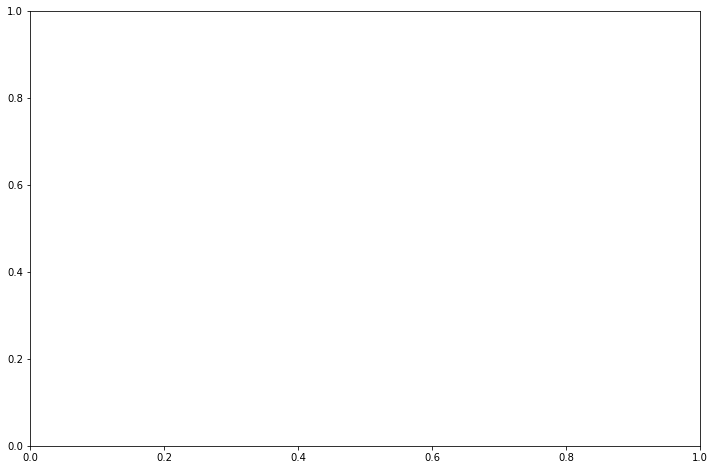

In [3]:
import statsmodels.api as sm 

def fit(X, params):
    return X.dot(params)

def cost_function(params, X, y):
    return np.sum(np.abs(y - fit(X, params)))


cmp = 'Z'
fig_size=(12,8)
fontsize=15
y_lim = 0.04

fig, ax = plt.subplots(figsize=fig_size)
daytime = []
line_num = 0
points = []
time_line = []
vs = 120
vm = 13.9
l = 7
t0 = 0.256
d_ind = 5
dr=np.sqrt(((d_ind+1)*t0*vm)**2+l**2)-np.sqrt((t0*vm)**2+l**2)
nline_num = int((endtime-starttime)/time_diff1)

for iline in range(0, nline_num):
    dA=[]
    acp0=[]
    acp=[]
    
    time_bg = starttime + iline*time_diff1
    time_ed = time_bg+time_diff2
    
    traffic_list = getdatalist(traffic_datapath, station, flag, time_bg, time_ed, cmp)
    print('traffic_list',traffic_datapath, station, flag, time_bg, time_ed, cmp)
    if traffic_list ==[]:
        continue
    else:
        daytime += [time_bg.datetime.date()]  # for legend
    
    for ipp in range(0, len(traffic_list)):
        traffic = np.load(traffic_list[ipp])
        dA.append(traffic['data'])
    dA_a=np.vstack((dA))
    k_a=np.zeros((len(dA_a)))
    c_a=np.zeros((len(dA_a)))
    for i in range(len(dA_a)):
        X = np.asarray([np.ones((ib-ia,)), ax_f[ia:ib]]).T
        y = dA_a[i,ia:ib]
        x0=np.array([0,0])
        output = minimize(cost_function, x0, args=(X, y),method='Nelder-Mead', tol=1e-7)
        y_hat = fit(X, output.x)
        dy=y-y_hat
        
        k_a[i] = output.x[1]
        c_a[i] = output.x[0]

    for i in range(len(k_a)):
        if (k_a[i] > 0):
            acp0.append(i)  
    for i in range(len(acp0)):
        if (k_a[acp0[i]] > np.quantile(k_a[acp0],ka_lpct)) and (k_a[acp0[i]] < np.quantile(k_a[acp0],ka_hpct)):# and (0<std_a[acp0[i]]<1.0):
            acp.append(acp0[i])

    y0 = np.zeros((ib-ia))
    yacp_al = []
    for j in range(len(acp)):#len(acp)
        y0 = k_a[acp[j]] * ax_f[ia:ib] + c_a[acp[j]]
        dy = np.abs(dA_a[acp[j],ia:ib] - y0)
        y_thr = np.quantile(dy,dy_pct)
        yacp = []
        for i in range(len(dy)):
            if dy[i] < y_thr:
                yacp.append(ia + i)
        yacp_al.append(yacp)
        
    
    par_init = np.zeros((2))
    x=[]
    for i in range(len(acp)):
        x.extend(ax_f[yacp_al[i]])
    y=[]
    
    for i in range(len(acp)):
        y.extend(dA_a[acp[i],yacp_al[i]])
        
    x = np.array(x)
    y = np.array(y)
    
    X = sm.add_constant(x)


    model = sm.OLS(np.array(y),X)
    results = model.fit()
    k = results.params[1]
    kl = results.conf_int(alpha=0.05, cols=None)[1][0]
    ku = results.conf_int(alpha=0.05, cols=None)[1][1]
    Q = vs * k / (np.pi * dr)
    Ql = vs * kl / (np.pi * dr)
    Qu = vs * ku / (np.pi * dr)
    print(Q,Ql,Qu)
    Q_title = '%s-%s-%s-%s-%s'%(station,flag_Q, time_bg.strftime("%Y.%m.%d.%H:%M:%S"),
                                  time_ed.strftime("%Y.%m.%d.%H:%M:%S"), cmp)
    path = data_output_path + Q_title
    np.savez(path, data=Q, ax1=np.array([]), time=time_bg.strftime("%Y.%m.%d.%H:%M:%S"), txt_hrd=Q_title)
    
    
    Ql_title = '%s-%s-%s-%s-%s'%(station,flag_Ql, time_bg.strftime("%Y.%m.%d.%H:%M:%S"),
                                  time_ed.strftime("%Y.%m.%d.%H:%M:%S"), cmp)
    path = data_output_path + Ql_title
    np.savez(path, data=Ql, ax1=np.array([]), time=time_bg.strftime("%Y.%m.%d.%H:%M:%S"), txt_hrd=Ql_title)
    
    Qu_title = '%s-%s-%s-%s-%s'%(station,flag_Qu, time_bg.strftime("%Y.%m.%d.%H:%M:%S"),
                                  time_ed.strftime("%Y.%m.%d.%H:%M:%S"), cmp)
    path = data_output_path + Qu_title
    np.savez(path, data=Qu, ax1=np.array([]), time=time_bg.strftime("%Y.%m.%d.%H:%M:%S"), txt_hrd=Qu_title)
    
    acp_title = '%s-%s-%s-%s-%s'%(station,flag_acp, time_bg.strftime("%Y.%m.%d.%H:%M:%S"),
                                  time_ed.strftime("%Y.%m.%d.%H:%M:%S"), cmp)
    path = data_output_path + acp_title
    np.savez(path, data=len(acp), ax1=np.array([]), time=time_bg.strftime("%Y.%m.%d.%H:%M:%S"), txt_hrd=acp_title)
    
    

# Plot all the parameters

## Q

DatetimeIndex(['2020-05-09', '2020-05-10'], dtype='datetime64[ns]', freq='D')


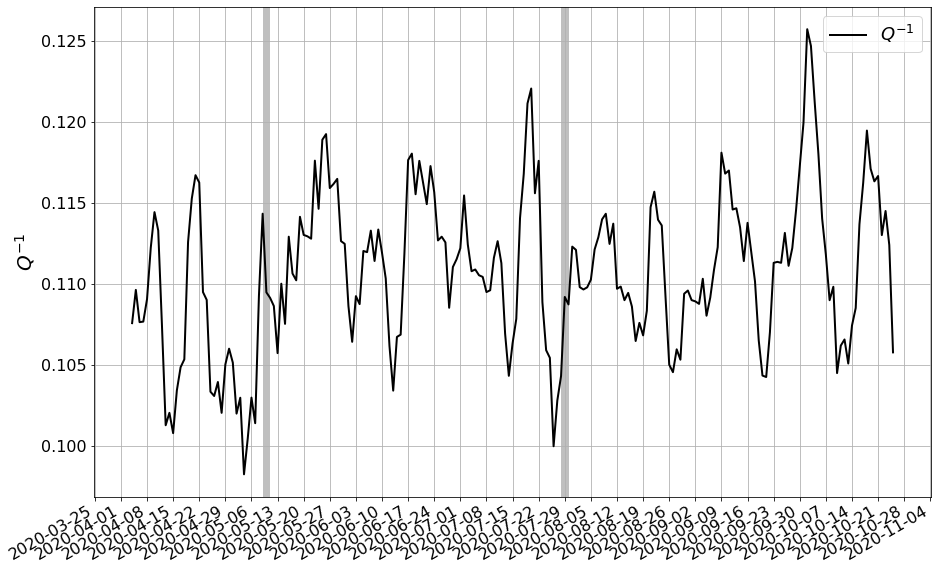

In [4]:
from traffic_events import *
from matplotlib import colors
import matplotlib as mpl
import pandas as pd

starttime_without_data1 = UTCDateTime(2020,5,9,0,0,0)   # no data begin time
endtime_without_data1   = UTCDateTime(2020,5,10,0,0,0)   # no data begin time
datelist_without_data1 = pd.date_range(starttime_without_data1.datetime, min(endtime_without_data1, UTCDateTime()).datetime, freq="D")
print(datelist_without_data1)


starttime_without_data2 = UTCDateTime(2020,7,28,0,0,0)   # no data begin time
endtime_without_data2   = UTCDateTime(2020,7,29,0,0,0)   # no data begin time
datelist_without_data2 = pd.date_range(starttime_without_data2.datetime, min(endtime_without_data2, UTCDateTime()).datetime, freq="D")


fig_size=(15,10)
fontsize=20
fig, ax = plt.subplots(figsize=fig_size)
daytime = []
line_num = 0
points0 = []
time_line = []
Q_list = getdatalist(data_output_path, station, flag_Q, starttime, endtime, cmp)

S16_df_Q=pd.DataFrame(columns=['time','Q'])   
    
for ipp in range(0, len(Q_list)):
    Q = np.load(Q_list[ipp])
    time = datetime.datetime.strptime(np.array2string(Q['time']),"'%Y.%m.%d.%H:%M:%S'")
    time1=time.strftime("%Y-%m-%d")
    S16_df_Q.loc[ipp,'time']=time1
    S16_df_Q.loc[ipp,'Q']=Q['data']
    points0 += [Q['data']]
    time_line += [time]

S16_df_Q.to_csv('./S16_df_Q.csv')

points0=np.array(points0)
line1,=ax.plot(time_line,points0, color='k',linewidth=2,label='$Q^{-1}$')

# beautify the x-labels
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

ax.set_ylabel('$Q^{-1}$', fontsize=fontsize)
     
ax.tick_params(axis='both', which='major', labelsize=16)

# ax.set_ylim(8,12)

ax.grid(True)
fig.autofmt_xdate() 

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)

plt.legend(handles=[line1],fontsize=18)
plt.savefig("Figure_WCPK_Q.jpg", bbox_inches = 'tight',dpi=600)
plt.show()



## Ql

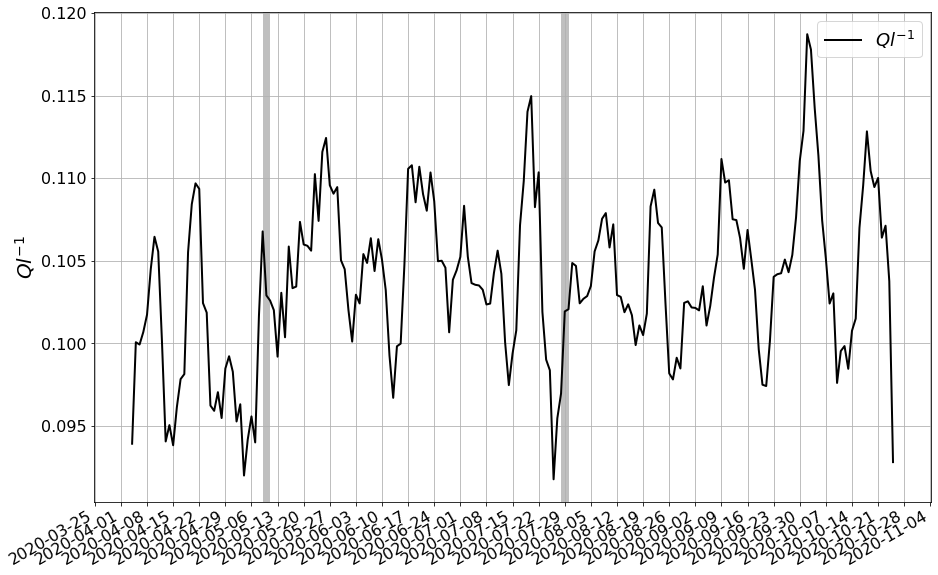

In [6]:
fig_size=(15,10)
fontsize=20
fig, ax = plt.subplots(figsize=fig_size)
daytime = []
line_num = 0
points0 = []
time_line = []
Ql_list = getdatalist(data_output_path, station, flag_Ql, starttime, endtime, cmp)

S16_df_Ql=pd.DataFrame(columns=['time','Ql'])   
    
for ipp in range(0, len(Ql_list)):
    Ql = np.load(Ql_list[ipp])
    time = datetime.datetime.strptime(np.array2string(Ql['time']),"'%Y.%m.%d.%H:%M:%S'")
    time1=time.strftime("%Y-%m-%d")
    S16_df_Ql.loc[ipp,'time']=time1
    S16_df_Ql.loc[ipp,'Ql']=Ql['data']
    points0 += [Ql['data']]
    time_line += [time]

S16_df_Ql.to_csv('./S16_df_Ql.csv')

points0=np.array(points0)
line1,=ax.plot(time_line,points0, color='k',linewidth=2,label='$Ql^{-1}$')

# beautify the x-labels
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

ax.set_ylabel('$Ql^{-1}$', fontsize=fontsize)
     
ax.tick_params(axis='both', which='major', labelsize=16)

# ax.set_ylim(8,12)

ax.grid(True)
fig.autofmt_xdate() 

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)


plt.legend(handles=[line1],fontsize=18)
plt.savefig("Figure_WCPK_Ql.jpg", bbox_inches = 'tight',dpi=600)
plt.show()



## Qu

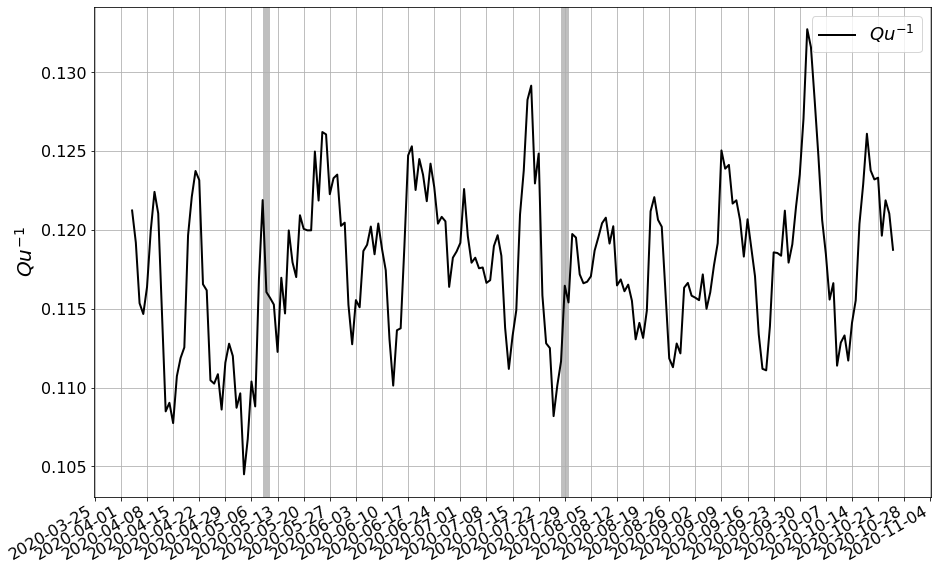

In [7]:
fig_size=(15,10)
fontsize=20
fig, ax = plt.subplots(figsize=fig_size)
daytime = []
line_num = 0
points0 = []
time_line = []
Qu_list = getdatalist(data_output_path, station, flag_Qu, starttime, endtime, cmp)

S16_df_Qu=pd.DataFrame(columns=['time','Qu'])   
    
for ipp in range(0, len(Qu_list)):
    Qu = np.load(Qu_list[ipp])
    time = datetime.datetime.strptime(np.array2string(Qu['time']),"'%Y.%m.%d.%H:%M:%S'")
    time1=time.strftime("%Y-%m-%d")
    S16_df_Qu.loc[ipp,'time']=time1
    S16_df_Qu.loc[ipp,'Qu']=Qu['data']
    points0 += [Qu['data']]
    time_line += [time]

S16_df_Qu.to_csv('./S16_df_Qu.csv')

points0=np.array(points0)
line1,=ax.plot(time_line,points0, color='k',linewidth=2,label='$Qu^{-1}$')

# beautify the x-labels
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

ax.set_ylabel('$Qu^{-1}$', fontsize=fontsize)
     
ax.tick_params(axis='both', which='major', labelsize=16)

# ax.set_ylim(8,12)

ax.grid(True)
fig.autofmt_xdate() 

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)

plt.legend(handles=[line1],fontsize=18)
plt.savefig("Figure_WCPK_Qu.jpg", bbox_inches = 'tight',dpi=600)
plt.show()



## Rainfall data

In [8]:
import pandas as pd
from datetime import datetime

csv_filename = 'Rainfall_Temperature.csv'

headers = ['country_region_code','Date','Daily rainfall total (mm)','Temperature (°C)','Morning rainfall (mm)','Evening rainfall (mm)']

selected_change = 'Daily rainfall total (mm)'
selected_change1 = 'Temperature (°C)'

df = pd.read_csv(csv_filename,names=headers)
df['Date'] = df['Date'].map(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))

x = df['Date']
y = df[selected_change]

y1 = df[selected_change1]

flag_rain = 'rainfall'
flag_temp = 'temp'
rainfall_output_path = './Rainfall_S16/'
rainfall_output_path_days = './Rainfall_S16_4days/'

for keys in [rainfall_output_path,rainfall_output_path_days] :
    if not os.path.exists(keys):
        print('creat %s' %keys)
        os.makedirs(keys)
        
starttime_r = UTCDateTime(2020,3,1,0,0,0)   # section begin time
endtime_r   = UTCDateTime(2020,11,10,0,0,0)   # section begin time        
oneday   = 3600*24

nline_num = int((endtime_r-starttime_r)/oneday)

for iline in range(0, nline_num):
    time_bg = starttime_r + iline*oneday
    time_ed = time_bg+oneday

    rain=y[iline]
    rain_title = '%s-%s-%s-%s-%s'%(station,flag_rain, time_bg.strftime("%Y.%m.%d.%H:%M:%S"),
                                  time_ed.strftime("%Y.%m.%d.%H:%M:%S"), cmp)
    path = rainfall_output_path + rain_title
    np.savez(path, data=rain, ax1=np.array([]), time=time_bg.strftime("%Y-%m-%d"), txt_hrd=rain_title)
    
    temp=y1[iline]
    temp_title = '%s-%s-%s-%s-%s'%(station,flag_temp, time_bg.strftime("%Y.%m.%d.%H:%M:%S"),
                                  time_ed.strftime("%Y.%m.%d.%H:%M:%S"), cmp)
    path = rainfall_output_path + temp_title
    np.savez(path, data=temp, ax1=np.array([]), time=time_bg.strftime("%Y-%m-%d"), txt_hrd=temp_title)
    

In [9]:
daytime = []
for iline in range(0, nline_num):
    rain0=[]
    temp0=[]
    time_bg = starttime_r + iline*time_diff1
    time_ed = time_bg+time_diff2
    
    rainfall_list = getdatalist(rainfall_output_path, station, flag_rain, time_bg, time_ed, cmp)
    temp_list = getdatalist(rainfall_output_path, station, flag_temp, time_bg, time_ed, cmp)
    if rainfall_list ==[]:
        continue
    else:
        daytime += [time_bg.datetime.date()] 
    for ipp in range(0, len(rainfall_list)):
        rain = np.load(rainfall_list[ipp])
        temp = np.load(temp_list[ipp])
        rain0.append(rain['data'])
        temp0.append(temp['data'])
    rainfall=np.sum((rain0))/len(rain0)
    temp=np.sum((temp0))/len(temp0)
    
    rain_title = '%s-%s-%s-%s-%s'%(station,flag_rain, time_bg.strftime("%Y.%m.%d.%H:%M:%S"),
                                  time_ed.strftime("%Y.%m.%d.%H:%M:%S"), cmp)
    path = rainfall_output_path_days + rain_title
    np.savez(path, data=rainfall, ax1=np.array([]), time=time_bg.strftime("%Y-%m-%d"), txt_hrd=rain_title)
    
    temp_title = '%s-%s-%s-%s-%s'%(station,flag_temp, time_bg.strftime("%Y.%m.%d.%H:%M:%S"),
                                  time_ed.strftime("%Y.%m.%d.%H:%M:%S"), cmp)
    path = rainfall_output_path_days + temp_title
    np.savez(path, data=temp, ax1=np.array([]), time=time_bg.strftime("%Y-%m-%d"), txt_hrd=temp_title)
    


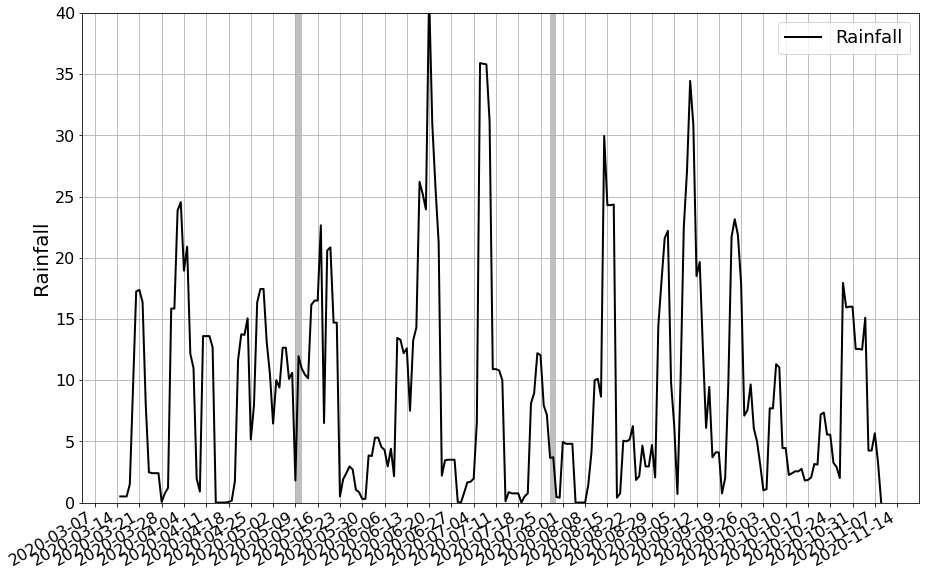

In [10]:
from traffic_events import *
from matplotlib import colors
import matplotlib as mpl

ylim_min2 = 0;
ylim_max2 = 40;
fig_size=(15,10)
fontsize=20

fig, ax = plt.subplots(figsize=fig_size)
daytime = []
line_num = 0
rainfall0 = []
time_line = []

rainfall_list = getdatalist(rainfall_output_path_days, station, flag_rain, starttime, endtime, cmp)

S16_df_rf=pd.DataFrame(columns=['time','Rainfall'])   
    
for ipp in range(0, len(rainfall_list)):
    rain= np.load(rainfall_list[ipp])
    time = datetime.datetime.strptime(np.array2string(rain['time']),"'%Y-%m-%d'")
    time1=time.strftime("%Y-%m-%d")
    S16_df_rf.loc[ipp,'time']=time1
    S16_df_rf.loc[ipp,'Rainfall']=rain['data']
    rainfall0+= [rain['data']]
    time_line += [time]

S16_df_rf.to_csv('./S16_df_rf.csv')   
rainfall0=np.array(rainfall0)
line1,=ax.plot(time_line,rainfall0, color='k',linewidth=2,label='Rainfall')

# beautify the x-labels
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.set_ylabel('Rainfall', fontsize=fontsize)    
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim([ylim_min2,ylim_max2])

ax.grid(True)
fig.autofmt_xdate() 

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)
for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)

plt.legend(handles=[line1],fontsize=18)
plt.savefig("Figure_WCPK_rf.jpg", bbox_inches = 'tight',dpi=600)
plt.show()


## Traffic count

4745.66666667
4810.0
4253.75
4030.0
4531.75
4606.75
5050.5
5011.75
4721.25
4151.25
4201.5
4328.25
4733.0
5276.5
5288.5
5063.5
4474.0
4377.75
4360.5
4590.25
5037.75
4716.0
4600.25
4165.5
4189.75
4708.0
4894.75
5074.25
5118.0
4004.0
3566.66666667
4144.33333333
4201.66666667
5799.66666667
5670.0
5522.75
5311.75
4917.0
5149.25
5270.75
5464.75
5719.5
5699.75
5705.25
5365.75
5145.0
5200.5
5438.5
5799.5
6225.5
6019.0
5425.5
5585.25
5643.25
5708.5
6104.75
5984.0
5727.25
5335.5
5417.5
5504.75
5676.75
6126.0
6037.0
5685.5
5215.75
5156.0
5076.5
5150.5
5490.0
5462.5
5469.25
5312.25
5332.5
5347.0
5355.25
5689.0
5770.5
5710.75
5284.0
5395.0
5353.25
5279.5
5689.5
5600.25
5507.0
5126.25
5288.5
5305.75
5374.5
5994.0
5501.25
5390.25
5080.25
5001.5
5456.25
5465.5
5784.0
5780.25
5585.75
5241.75
5442.5
5550.75
5795.25
6170.75
6015.0
5791.75
5223.0
5206.25
5170.25
5107.66666667
5746.66666667
5425.66666667
5454.33333333
5117.75
5188.25
5563.75
5509.5
5981.5
5904.75
5764.5
5388.25
5059.25
5044.0
5107.25
5533.

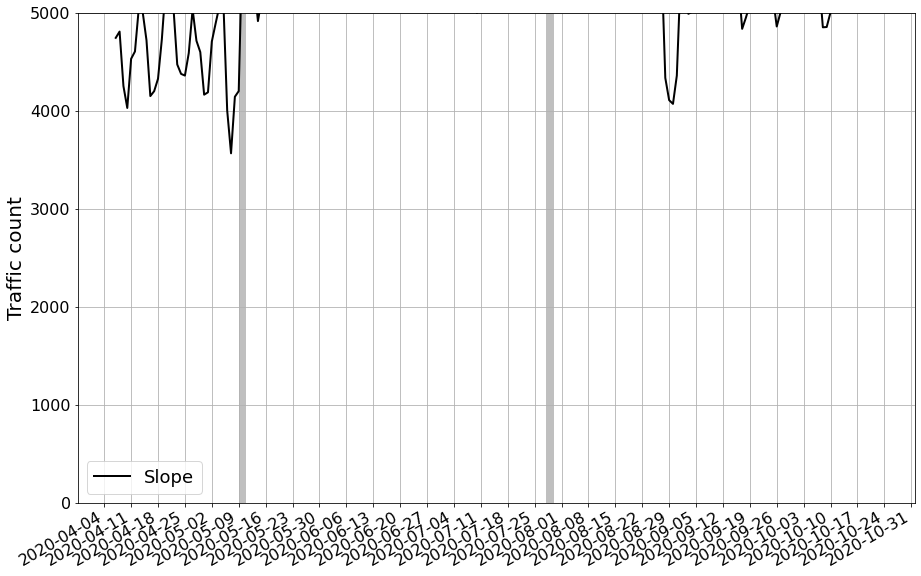

In [11]:
from traffic_events import *
from matplotlib import colors
import matplotlib as mpl
import pandas as pd

peaks_datapath='./S16_dA_peaks/'
peak_output_path_days='./Peak_S16_4days/'

for keys in [peak_output_path_days] :
    if not os.path.exists(keys):
        print('creat %s' %keys)
        os.makedirs(keys)
starttimep = UTCDateTime(2020,4,7,0,0,0)   # section begin time
endtimep   = UTCDateTime(2020,10,23,0,0,0)   # section begin time
nline_num = int((endtimep-starttimep)/oneday)  

daytime = []
for iline in range(0, nline_num):
    peak0=[]
    time_bg = starttimep + iline*time_diff1
    time_ed = time_bg+time_diff2
    peak_list = getdatalist(peaks_datapath, station, flag_peaks, time_bg, time_ed, cmp)
    if peak_list ==[]:
        continue
    else:
        daytime += [time_bg.datetime.date()]  # for legend
    
    for ipp in range(0, len(peak_list)):
        peak = np.load(peak_list[ipp])
        peak0.append(peak['data'])

    peak_days=np.sum((peak0))/len(peak0)
    
    print(peak_days)
    peak_title = '%s-%s-%s-%s-%s'%(station,flag_peaks, time_bg.strftime("%Y.%m.%d.%H:%M:%S"),
                                  time_ed.strftime("%Y.%m.%d.%H:%M:%S"), cmp)
    path = peak_output_path_days + peak_title
    np.savez(path, data=peak_days, ax1=np.array([]), time=time_bg.strftime("%Y-%m-%d"), txt_hrd=peak_title)
    
    
ylim_min2 = 0;
ylim_max2 = 5000;

fig_size=(15,10)
fontsize=20

fig, ax = plt.subplots(figsize=fig_size)
daytime = []
line_num = 0
points_pks = []
peaks = []
time_line = []
time_line1 = []

peaks_list = getdatalist(peak_output_path_days, station, flag_peaks, starttime, endtime, cmp)
# print(len(Q_list),len(peaks_list))

S16_df_peaks=pd.DataFrame(columns=['time','Traffic Count'])
    
for ipp in range(0, len(peaks_list)):
    pks= np.load(peaks_list[ipp])
    time = datetime.datetime.strptime(np.array2string(pks['time']), "'%Y-%m-%d'")
    time1=time.strftime("%Y-%m-%d")
    S16_df_peaks.loc[ipp,'time']=time1
    S16_df_peaks.loc[ipp,'Traffic Count']=pks['data']
    peaks += [pks['data']]
    time_line += [time]

peaks=np.array(peaks)
S16_df_peaks.to_csv('./S16_df_peaks.csv')  
line1,=ax.plot(time_line,S16_df_peaks['Traffic Count'], color='k',linewidth=2,label='Slope')

# beautify the x-labels
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.set_ylabel('Traffic count', fontsize=fontsize)     
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim([ylim_min2,ylim_max2])
# # ax.set_ylim(0,500)

ax.grid(True)
fig.autofmt_xdate() 

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)

    
plt.legend(handles=[line1],fontsize=18)
plt.savefig("Figure_WCPK_pks.jpg", bbox_inches = 'tight',dpi=600)
plt.show()


## Temperature

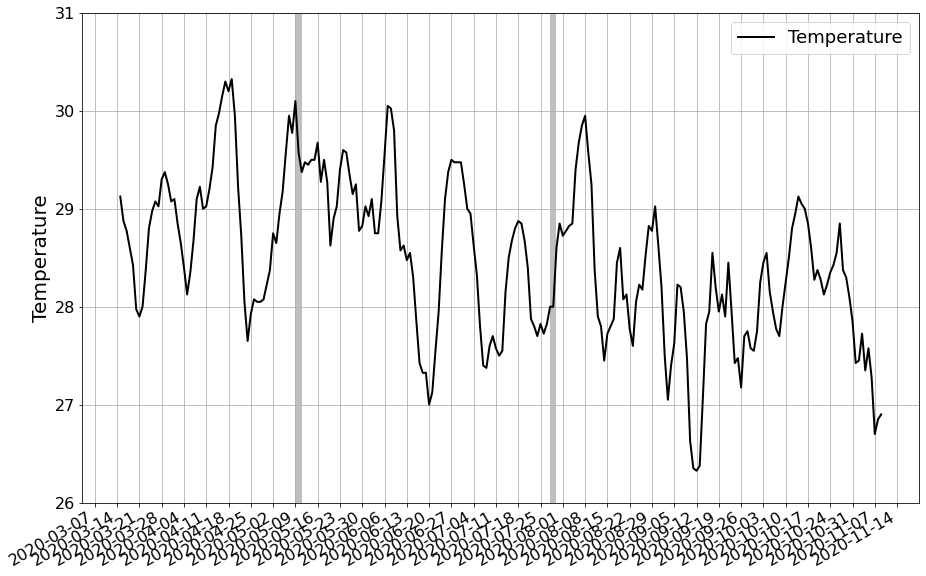

In [12]:
from traffic_events import *
from matplotlib import colors
import matplotlib as mpl

ylim_min2 = 26;
ylim_max2 = 31;
fig_size=(15,10)
fontsize=20

fig, ax = plt.subplots(figsize=fig_size)
daytime = []
line_num = 0
points0 = []
rainfall0=[]
time_line = []
temp0=[]
temp_list = getdatalist(rainfall_output_path_days, station, flag_temp, starttime, endtime, cmp)

S16_df_temp=pd.DataFrame(columns=['time','Temperature'])   
    
for ipp in range(0, len(temp_list)):
    temp= np.load(temp_list[ipp])
    time = datetime.datetime.strptime(np.array2string(temp['time']),"'%Y-%m-%d'") #"'%Y.%m.%d.%H:%M:%S'")
    time1=time.strftime("%Y-%m-%d")
    S16_df_temp.loc[ipp,'time']=time1
    S16_df_temp.loc[ipp,'Temperature']=temp['data']
    temp0+= [temp['data']]
    time_line += [time]

S16_df_temp.to_csv('./S16_df_temp.csv')  
temp0=np.array(temp0)
line1,=ax.plot(time_line,S16_df_temp['Temperature'], color='k',linewidth=2,label='Temperature')

# beautify the x-labels
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.set_ylabel('Temperature', fontsize=fontsize)    
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim([ylim_min2,ylim_max2])
ax.grid(True)
fig.autofmt_xdate() 

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.5, zorder=-5)


plt.legend(handles=[line1],fontsize=18)
plt.savefig("Figure_WCPK_temp.jpg", bbox_inches = 'tight',dpi=600)
plt.show()

# Results

## Q variations over time vs potential factors

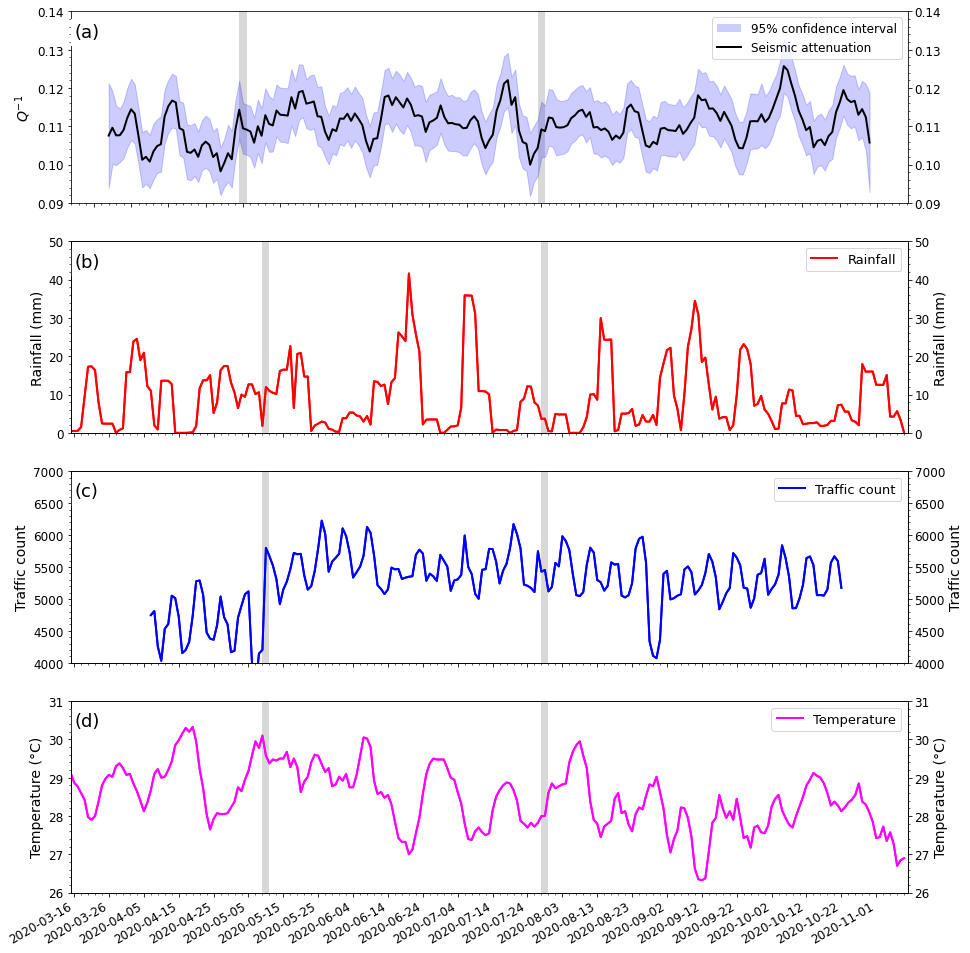

In [14]:
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D

df1=pd.read_csv('S16_df_Q.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

df11=pd.read_csv('S16_df_Ql.csv')
df11.drop(['Unnamed: 0'], axis=1, inplace=True)

df12=pd.read_csv('S16_df_Qu.csv')
df12.drop(['Unnamed: 0'], axis=1, inplace=True)


df2=pd.read_csv('S16_df_rf.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

df3=pd.read_csv('S16_df_peaks.csv')
df3.drop(['Unnamed: 0'], axis=1, inplace=True) 
 
df4=pd.read_csv('S16_df_temp.csv')
df4.drop(['Unnamed: 0'], axis=1, inplace=True) 

S16_df01=df1.merge(df11, how='outer', on='time',sort=True)
S16_df02=S16_df01.merge(df12, how='outer', on='time',sort=True)
S16_df1=S16_df02.merge(df2, how='outer', on='time',sort=True)
S16_df2=S16_df1.merge(df3, how='outer', on='time',sort=True)
S16_df3=S16_df2.merge(df4, how='outer', on='time',sort=True)
S16_df3.to_csv('./S16_df.csv') 
df=pd.read_csv('S16_df.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True) 

fig, ax = plt.subplots(4,1,figsize=(15, 18))
letters='abcd'

df['time'] = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"), df['time']))

line, = ax[0].plot(df['time'], df['Q'], color='black', linewidth=2,label='Seismic attenuation')
ax[0].fill_between(df['time'], df['Ql'],df['Qu'],color='blue',alpha=0.2)
ax[0].legend(fontsize=13)
ax[0].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[0].minorticks_on()
ax[0].tick_params(axis='y', which='minor', right=True)
ax[0].set_ylabel('$Q^{-1}$',fontsize=14)
ax[0].set_ylim(0.09,0.14)

ax[0].tick_params(axis='both', which='major', labelsize=12)
patch = mpatches.Patch(facecolor='blue', alpha=0.2, linewidth=0)
ax[0].legend([patch, line], ["95% confidence interval","Seismic attenuation"], fontsize=12, handler_map = {line : HandlerLine2D(marker_pad = 0)} )


for dbi in datelist_without_data1:
    ax[0].axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data2:
    ax[0].axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)
    
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[0].xaxis.set_major_formatter(myFmt)
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[0].text(x=0.005, y=0.94, transform=ax[0].transAxes, s="("+letters[0]+")", fontsize=18, 
                verticalalignment="top", bbox={"edgecolor": "w", "linewidth": 1, "facecolor": "w",})

ax[1].plot(df['time'], df['Rainfall'], color='r',linewidth=2, label='Rainfall')
ax[1].legend(fontsize=13)
ax[1].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[1].minorticks_on()
ax[1].tick_params(axis='y', which='minor', right=True)
ax[1].set_ylabel('Rainfall (mm)',fontsize=14)
ax[1].set_ylim(0,50)
ax2=ax[1].twinx()
ax2.plot(df['time'], df['Rainfall'], color='r',linewidth=2, label='Rainfall')
ax2.minorticks_on()
ax2.tick_params(axis='y', which='minor', right=True)
ax2.set_ylabel('Rainfall (mm)',fontsize=14)

ax2.set_ylim(0,50)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlim(starttime._get_datetime(),endtime._get_datetime())

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)



myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[1].xaxis.set_major_formatter(myFmt)
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[1].text(x=0.005, y=0.94, transform=ax[1].transAxes, s="("+letters[1]+")", fontsize=18, 
                verticalalignment="top", bbox={"edgecolor": "w", "linewidth": 1, "facecolor": "w",})

ax[2].plot(df['time'], df['Traffic Count'], color='b',linewidth=2, label='Traffic count')
ax[2].legend(fontsize=13)
ax[2].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[2].minorticks_on()
ax[2].tick_params(axis='y', which='minor', right=True)
ax[2].set_ylabel('Traffic count',fontsize=14)
ax[2].set_ylim(4000,7000)
ax3=ax[2].twinx()
ax3.plot(df['time'], df['Traffic Count'], color='b',linewidth=2,label='Traffic count')
ax3.minorticks_on()
ax3.tick_params(axis='y', which='minor', right=True)
ax3.set_ylabel('Traffic count',fontsize=14)

ax3.set_ylim(4000,7000)
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_xlim(starttime._get_datetime(),endtime._get_datetime())
for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[2].xaxis.set_major_formatter(myFmt)
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[2].text(x=0.005, y=0.94, transform=ax[2].transAxes, s="("+letters[2]+")", fontsize=18, 
                verticalalignment="top", bbox={"edgecolor": "w", "linewidth": 1, "facecolor": "w",})


ax[3].plot(df['time'], df['Temperature'], color='magenta',linewidth=2,label='Temperature')
ax[3].legend(fontsize=13)
ax[3].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[3].minorticks_on()
ax[3].tick_params(axis='y', which='minor', right=True)
ax[3].set_ylabel('Temperature (°C)',fontsize=14)
ax[3].set_ylim(26,31)

ax4=ax[3].twinx()
ax4.plot(df['time'], df['Temperature'], color='magenta',linewidth=2,label='Temperature')
ax4.minorticks_on()
ax4.tick_params(axis='y', which='minor', right=True)
ax4.set_ylabel('Temperature (°C)',fontsize=14)

ax4.set_ylim(26,31)
ax[3].tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.set_xlim(starttime._get_datetime(),endtime._get_datetime())
for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[3].xaxis.set_major_formatter(myFmt)
ax[3].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[3].text(x=0.005, y=0.94, transform=ax[3].transAxes, s="("+letters[3]+")", fontsize=18, 
                verticalalignment="top", bbox={"edgecolor": "w", "linewidth": 1, "facecolor": "w",})

fig.autofmt_xdate()
plt.savefig("Figure_WCPK_all.jpg", bbox_inches = 'tight',dpi=600)

## Cross-correlation between Q and potential factors

In [10]:
def bpfilt(s,bp):
    r'''
    1D or 2D band-pass filter:
        input: 
            s-input waveform (1D, nt-by- or 2D, nt-by-nr)
            bp-band pass cut frequency relative to Nyquist (1D, (4-by-))
        output:
            y-output waveform (1D, nt-by- or 2D, nt-by-nr)
    '''
    D = np.array(s.shape)
    if D.size == 2:
        # 2D case
        nt,nr = D[:]
    else:
        # 1D case
        nt = D[0]
        nr = 1
    f = np.fft.fftfreq(nt,0.5)
    nh = (nt+1)//2
    w = np.zeros(f.shape)
    mask = (np.abs(f)>=bp[0]) * (np.abs(f)<bp[1])
    w[mask] = (np.abs(f[mask])-bp[0])/(bp[1]-bp[0])
    mask = (np.abs(f)>=bp[1]) * (np.abs(f)<bp[2])
    w[mask] = 1
    mask = (np.abs(f)>=bp[2]) * (np.abs(f)<bp[3])
    w[mask] = (np.abs(f[mask])-bp[3])/(bp[2]-bp[3])
    if nr == 1:
        S = np.fft.fft(s)
        y = np.fft.ifft(S*w).real
    else:
        S = np.fft.fft(s,axis=0)
        Y = S*(np.tile(w,(nr,1)).transpose())
        y = np.fft.ifft(Y,axis=0).real
    return y

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df1 = pd.read_csv('S16_df_Q.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

df2 = pd.read_csv('S16_df_rf.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

df3 = pd.read_csv('S16_df_peaks.csv')
df3.drop(['Unnamed: 0'], axis=1, inplace=True) 
 
df4 = pd.read_csv('S16_df_temp.csv')
df4.drop(['Unnamed: 0'], axis=1, inplace=True) 


S16_df1 = df1.merge(df2, how='outer', on='time',sort=True)
S16_df2 = S16_df1.merge(df3, how='outer', on='time',sort=True)
S16_df3 = S16_df2.merge(df4, how='outer', on='time',sort=True)
S16_df3 = S16_df3[(S16_df3['time'] > '2020-04-06') & (S16_df3['time'] < '2020-10-21')]

S16_df3.to_csv('./S16_df.csv') 
df = pd.read_csv('S16_df.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True) 
df=df.dropna()

### $Q^{-1}$ and rainfall

0.238269969382


Text(0.5, 1.0, 'max correlation is at lag 9')

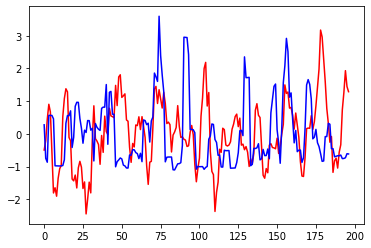

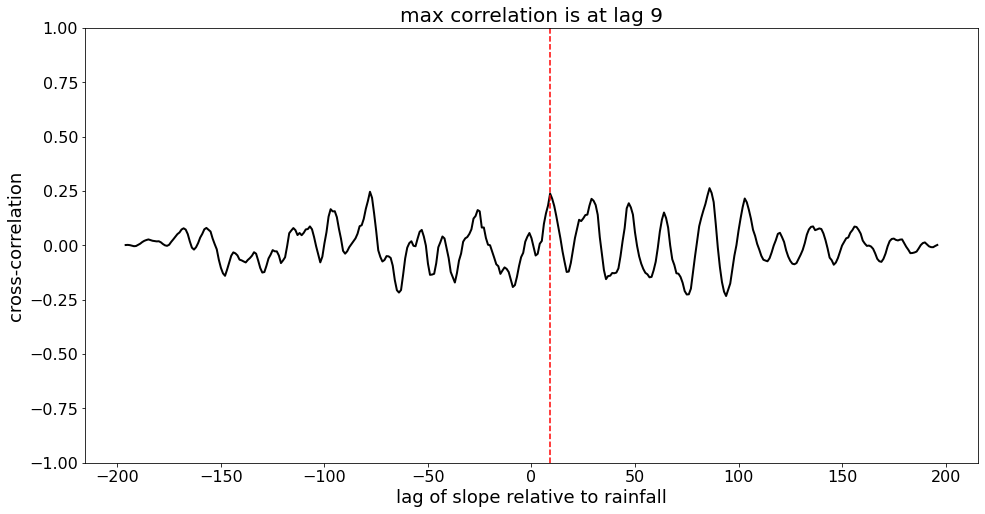

In [12]:
y01 = df['Q']
y02 = df['Rainfall']

y11 = bpfilt(y01,[0,0,0.01,0.02])
dy1 = y01-y11
y21 = bpfilt(y02,[0,0,0.01,0.02])
dy2 = y02-y21
plt.plot(dy1/dy1.std(),'r')
plt.plot(dy2/dy2.std(),'b')

y01 = y01-y11
y02 = y02-y21

lc = 30
lg = np.arange(0, lc+1)

npts_0 = len(y01)
lags_0 = np.arange(-npts_0+1, npts_0)
ccov0 = np.correlate(y01 - y01.mean(), y02 - y02.mean(), mode='full')
ccor_0 = ccov0 / (npts_0 * y01.std() * y02.std())
maxlag = lg[np.argmax(abs(ccor_0[npts_0-1:npts_0+lc]))]
print(max(abs(ccor_0[npts_0-1:npts_0+lc])))

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(lags_0, ccor_0,color='k',linewidth=2)
ax.axvline(maxlag,color='r',linestyle='--',label='Peak synchrony')
ax.set_ylabel('cross-correlation',fontsize=18)
ax.set_xlabel('lag of slope relative to rainfall',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(-1, 1)
plt.title("max correlation is at lag %d" % maxlag, fontsize=20)

### $Q^{-1}$ and traffic count

0.316723007529


Text(0.5, 1.0, 'max correlation is at lag 0')

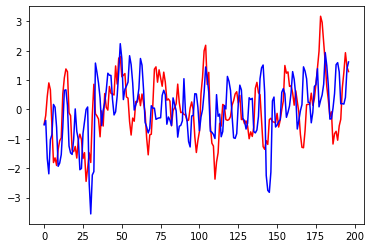

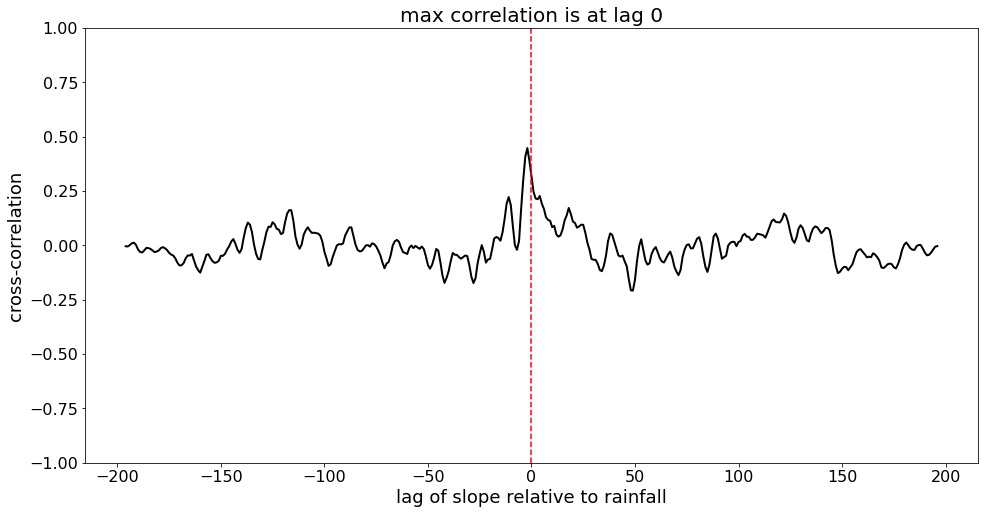

In [13]:
y01 = df['Q']
y02 = df['Traffic Count']
y11 = bpfilt(y01,[0,0,0.01,0.02])
dy1 = y01-y11
y21 = bpfilt(y02,[0,0,0.01,0.02])
dy2 = y02-y21
plt.plot(dy1/dy1.std(),'r')
plt.plot(dy2/dy2.std(),'b')
y01 = y01-y11
y02 = y02-y21
lc = 200
lg = np.arange(0, lc + 1)
npts_0 = len(y01)
lags_0 =  np.arange(-npts_0+1, npts_0)
ccov0 = np.correlate(y01 - y01.mean(), y02 - y02.mean(), mode='full')
ccor_0 = ccov0 / (npts_0 * y01.std() * y02.std())
maxlag = lg[np.argmax((ccor_0[npts_0-1:npts_0+lc]))]
print(max((ccor_0[npts_0-1:npts_0+lc])))
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(lags_0, ccor_0,color='k',linewidth=2)
ax.axvline(maxlag,color='r',linestyle='--',label='Peak synchrony')
ax.set_ylabel('cross-correlation',fontsize=18)
ax.set_xlabel('lag of slope relative to rainfall',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(-1, 1)
plt.title("max correlation is at lag %d" % maxlag, fontsize=20)

### $Q^{-1}$ and temperature

0.23641063928


Text(0.5, 1.0, 'max correlation is at lag 28')

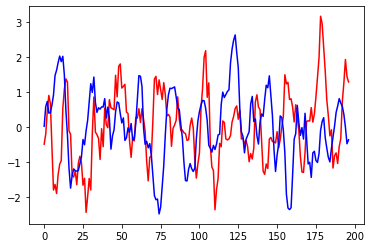

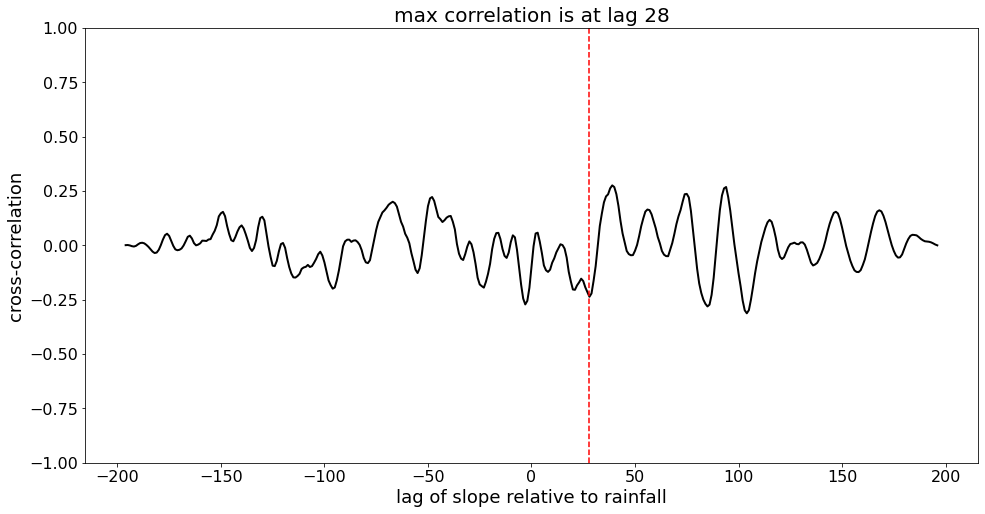

In [14]:
y01 = df['Q']
y02 = df['Temperature']
y11 = bpfilt(y01,[0,0,0.01,0.02])
dy1 = y01-y11
y21 = bpfilt(y02,[0,0,0.01,0.02])
dy2 = y02-y21
plt.plot(dy1/dy1.std(),'r')
plt.plot(dy2/dy2.std(),'b')
y01 = y01-y11
y02 = y02-y21
lc = 30
lg = np.arange(0, lc+1)
npts_0 = len(y01)
lags_0 = np.arange(-npts_0+1, npts_0)
ccov0 = np.correlate(y01 - y01.mean(), y02 - y02.mean(), mode='full')
ccor_0 = ccov0 / (npts_0 * y01.std() * y02.std())
maxlag = lg[np.argmax(abs(ccor_0[npts_0-1:npts_0+lc]))]
print(max(abs(ccor_0[npts_0-1:npts_0+lc])))
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(lags_0, ccor_0,color='k',linewidth=2)
ax.axvline(maxlag,color='r',linestyle='--',label='Peak synchrony')
ax.set_ylabel('cross-correlation',fontsize=18)
ax.set_xlabel('lag of slope relative to rainfall',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(-1, 1)
plt.title("max correlation is at lag %d" % maxlag, fontsize=20)

### $rainfall and temperature

0.653250410023


Text(0.5, 1.0, 'max correlation is at lag 0')

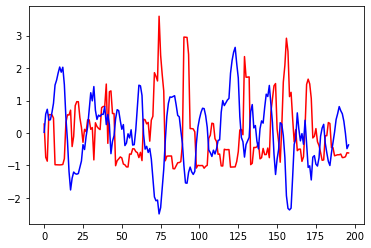

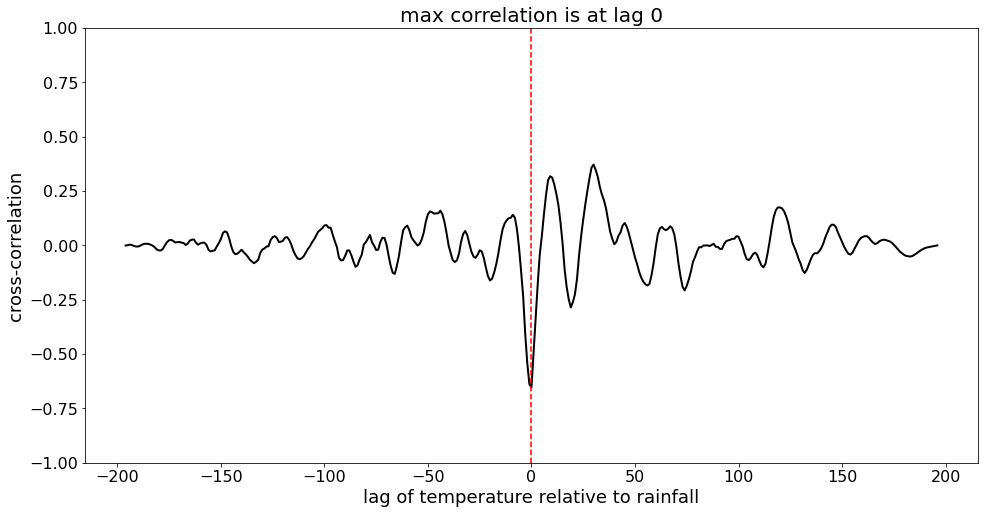

In [15]:
df = pd.read_csv('S16_df.csv')
df = df[:199]
y01 = df['Rainfall']
y02 = df['Temperature']
y11 = bpfilt(y01,[0,0,0.01,0.02])
dy1 = y01-y11
y21 = bpfilt(y02,[0,0,0.01,0.02])
dy2 = y02-y21
plt.plot(dy1/dy1.std(),'r')
plt.plot(dy2/dy2.std(),'b')
y01 = y01-y11
y02 = y02-y21

lc = 7
lg = np.arange(0, lc+1)
npts_0 = len(y01)
lags_0 = np.arange(-npts_0+1, npts_0)
ccov0 = np.correlate(y01 - y01.mean(), y02 - y02.mean(), mode='full')
ccor_0 = ccov0 / (npts_0 * y01.std() * y02.std())
maxlag = lg[np.argmax(abs(ccor_0[npts_0-1:npts_0+lc]))]
print(max(abs(ccor_0[npts_0-1:npts_0+lc])))

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(lags_0, ccor_0,color='k',linewidth=2)
ax.axvline(maxlag,color='r',linestyle='--',label='Peak synchrony')
ax.set_ylabel('cross-correlation',fontsize=18)
ax.set_xlabel('lag of temperature relative to rainfall',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(-1, 1)
plt.title("max correlation is at lag %d" % maxlag, fontsize=20)

## Shorter window cross-correlations

### time window size=5

Text(0, 0.5, 'Percentage')

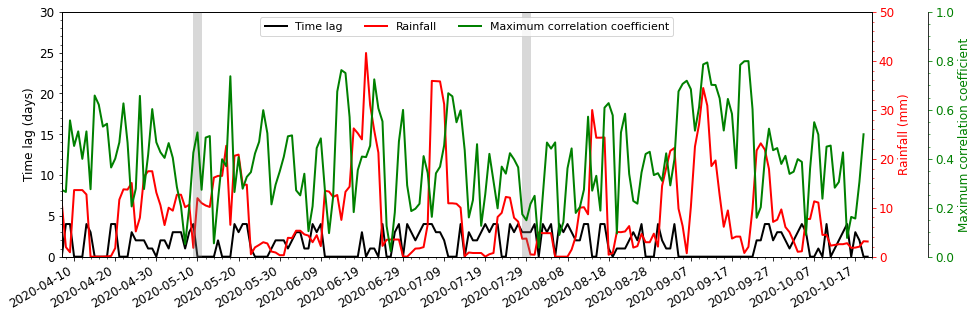

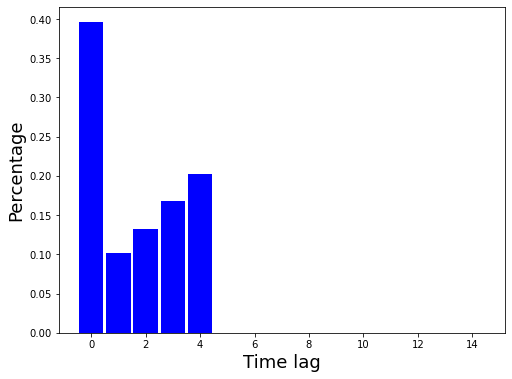

In [16]:
starttime = UTCDateTime(2020,4,7,0,0,0)   # section begin time
endtime   = UTCDateTime(2020,10,21,0,0,0)   # section begin time

df1 = pd.read_csv('S16_df_Q.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

df2 = pd.read_csv('S16_df_rf.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

df3 = pd.read_csv('S16_df_peaks.csv')
df3.drop(['Unnamed: 0'], axis=1, inplace=True) 
 
df4 = pd.read_csv('S16_df_temp.csv')
df4.drop(['Unnamed: 0'], axis=1, inplace=True) 


S16_df1 = df1.merge(df2, how='outer', on='time',sort=True)
S16_df2 = S16_df1.merge(df3, how='outer', on='time',sort=True)
S16_df3 = S16_df2.merge(df4, how='outer', on='time',sort=True)
S16_df3 = S16_df3[(S16_df3['time'] > '2020-04-06') & (S16_df3['time'] < '2020-10-21')]

S16_df3.to_csv('./S16_df.csv') 
df = pd.read_csv('S16_df.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True) 


tw = 5
tl = np.zeros(len(df))
maxc = np.zeros(len(df))

y01 = df['Q'].interpolate()
y02 = df['Rainfall'].interpolate()
y11 = bpfilt(y01,[0,0,0.01,0.02])
y21 = bpfilt(y02,[0,0,0.01,0.02])

y01 = y01-y11
y02 = y02-y21

for i in range(len(df)):
    s1 = y01[i:i+tw]
    s2 = y02[i:i+tw]
    lc = tw
    lg = np.arange(0, lc+1)
    npts = len(s1)
    lags = np.arange(-npts+1, npts)
    ccov = np.correlate(s1 - s1.mean(), s2 - s2.mean(), mode='full')
    ccor = ccov / (npts * s1.std() * s2.std())
    maxlag = lg[np.argmax((ccor[npts-1:npts+lc]))]
    maxc[i] = max((ccor[npts-1:npts+lc]))
    tl[i] = maxlag

df['time_lags'] = tl
df['maxc'] = maxc
df.to_csv('./S16_df_all.csv') 

fig, ax = plt.subplots(figsize=(18, 5))
fig.subplots_adjust(right=0.75)
df['time'] = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"), df['time']))
l1,=ax.plot(df['time'], df['time_lags'], color = 'black', linewidth = 2,label = 'Time lag')
ax.tick_params(bottom = 'on',left = 'on',right = 'on',labelright='on')
ax.minorticks_on()
ax.tick_params(axis = 'y', which='minor', right=True)
ax.set_ylabel('Time lag (days)',fontsize=12)
ax.set_ylim(0,30)
ax0=ax.twinx()
l2,=ax0.plot(df['time'], df['Rainfall'], color='red', linewidth=2,label = 'Rainfall (mm)')
ax0.minorticks_on()
ax0.tick_params(axis='y', which='minor', right=True,color='red')
ax0.set_ylabel('Rainfall (mm)',fontsize = 12,color = 'red')

ax0.set_ylim(0,50)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax0.tick_params(axis = 'both', which = 'major', labelsize = 12,labelcolor = 'red',color = 'red')
ax0.set_xlim(starttime._get_datetime(),endtime._get_datetime())


ax1=ax.twinx()
ax1.spines['right'].set_position(("axes", 1.07))
l3,=ax1.plot(df['time'], df['maxc'], color='g', linewidth=2,label='Maximum correlation coefficient')
ax1.minorticks_on()
ax1.tick_params(axis = 'y', which = 'minor', right = True,color = 'g')
ax1.set_ylabel('Maximum correlation coefficient',fontsize=12, color='g')
plt.legend([l1,l2,l3],['Time lag','Rainfall','Maximum correlation coefficient'],ncol=3,loc='upper center',fontsize=11)
ax1.set_ylim(0,1)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12,labelcolor = 'g',color = 'g')
ax1.set_xlim(starttime._get_datetime(),endtime._get_datetime())


for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)
    
for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
fig.autofmt_xdate()

plt.savefig("Figure_WCPK_cc_tw5.jpg", bbox_inches = 'tight',dpi=600)

fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(df['time_lags'],bins=15,range=(0,15),align='left',color='blue',rwidth=0.9,density=True)
plt.xlabel("Time lag",fontsize=18)
plt.ylabel("Percentage",fontsize=18)

In [17]:
df = pd.read_csv('S16_df_all.csv')
df1 = df.groupby(['time_lags']).size()
df1
a_15 = np.array([78,20,26,33,40,0,0,0,0,0,0,0,0,0,0])
a = df1.tolist()
a
df1

time_lags
0.0    78
1.0    20
2.0    26
3.0    33
4.0    40
dtype: int64

In [18]:
df = pd.read_csv('S16_df_all.csv')

df1 = pd.DataFrame(df.loc[df['maxc'] >= 0.5])#.boxplot(column='ccs',by='time_lags')
df2 = df1.groupby(['time_lags']).size()
b_15 = np.array([40,5,1,0,7,0,0,0,0,0,0,0,0,0,0])
b = df2.tolist()
df2

time_lags
0.0    40
1.0     5
2.0     1
4.0     7
dtype: int64

In [19]:
from matplotlib.ticker import PercentFormatter
df = pd.read_csv('S16_df_all.csv')
ltl = len(df['time_lags'])
x1 = b_15/ltl*100
x2 = (a_15-b_15)/ltl*100
x = np.vstack((x1,x2))
x
aa = np.arange(0,15)
aa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

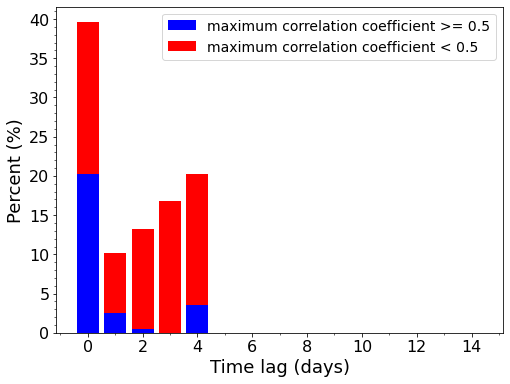

In [20]:
from matplotlib.ticker import MultipleLocator
fig, ax = plt.subplots(figsize=(8, 6))

p1=plt.bar(aa,x1,color = 'b',label = 'maximum correlation coefficient >= 0.5')
p2=plt.bar(aa,x2,bottom = x1,color= 'r',label = 'maximum correlation coefficient < 0.5')
plt.xlabel("Time lag (days)",fontsize = 18)
plt.ylabel("Percent (%)",fontsize = 18)
plt.legend(fontsize = 14)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.minorticks_on()
ax.xaxis.set_major_locator(MultipleLocator(2))  # major ticks every 100 (optional)
ax.xaxis.set_minor_locator(MultipleLocator(1))   # minor ticks every 10
# ax.tick_params(axis='x', which='minor', bottom=False)#disable x minor ticks
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) 
plt.savefig("Figure_WCPK_hist_tw5.jpg", bbox_inches = 'tight',dpi=600)

### time window size=15

Text(0, 0.5, 'Percentage')

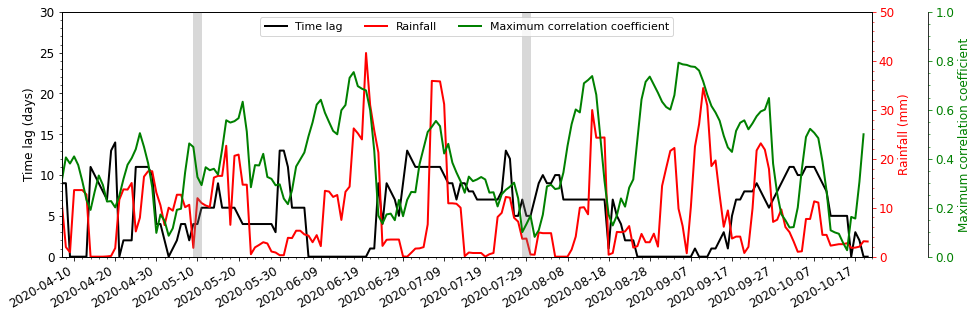

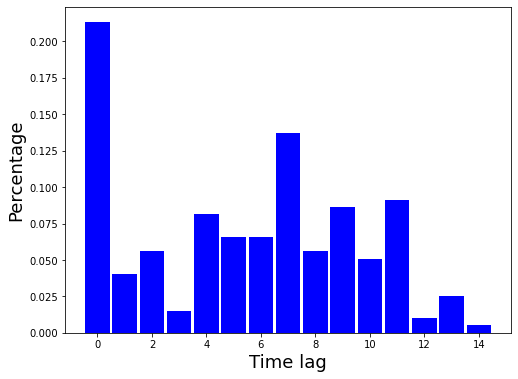

In [21]:
df1 = pd.read_csv('S16_df_Q.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

df2 = pd.read_csv('S16_df_rf.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

df3 = pd.read_csv('S16_df_peaks.csv')
df3.drop(['Unnamed: 0'], axis=1, inplace=True) 
 
df4 = pd.read_csv('S16_df_temp.csv')
df4.drop(['Unnamed: 0'], axis=1, inplace=True) 


S16_df1 = df1.merge(df2, how='outer', on='time',sort=True)
S16_df2 = S16_df1.merge(df3, how='outer', on='time',sort=True)
S16_df3 = S16_df2.merge(df4, how='outer', on='time',sort=True)
S16_df3 = S16_df3[(S16_df3['time'] > '2020-04-06') & (S16_df3['time'] < '2020-10-21')]

S16_df3.to_csv('./S16_df.csv') 
df = pd.read_csv('S16_df.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True) 


tw = 15
tl = np.zeros(len(df))
maxc = np.zeros(len(df))

y01 = df['Q'].interpolate()
y02 = df['Rainfall'].interpolate()
y11 = bpfilt(y01,[0,0,0.01,0.02])
y21 = bpfilt(y02,[0,0,0.01,0.02])

y01 = y01-y11
y02 = y02-y21

for i in range(len(df)):
    s1 = y01[i:i+tw]
    s2 = y02[i:i+tw]
    lc = tw
    lg = np.arange(0, lc+1)
    npts = len(s1)
    lags = np.arange(-npts+1, npts)
    ccov = np.correlate(s1 - s1.mean(), s2 - s2.mean(), mode='full')
    ccor = ccov / (npts * s1.std() * s2.std())
    maxlag = lg[np.argmax((ccor[npts-1:npts+lc]))]
    maxc[i] = max((ccor[npts-1:npts+lc]))
    tl[i] = maxlag

df['time_lags'] = tl
df['maxc'] = maxc
df.to_csv('./S16_df_all.csv') 

fig, ax = plt.subplots(figsize=(18, 5))
fig.subplots_adjust(right=0.75)
df['time'] = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"), df['time']))
l1,=ax.plot(df['time'], df['time_lags'], color = 'black', linewidth = 2,label = 'Time lag')
ax.tick_params(bottom = 'on',left = 'on',right = 'on',labelright='on')
ax.minorticks_on()
ax.tick_params(axis = 'y', which='minor', right=True)
ax.set_ylabel('Time lag (days)',fontsize=12)
ax.set_ylim(0,30)
ax0=ax.twinx()
l2,=ax0.plot(df['time'], df['Rainfall'], color='red', linewidth=2,label = 'Rainfall (mm)')
ax0.minorticks_on()
ax0.tick_params(axis='y', which='minor', right=True,color='red')
ax0.set_ylabel('Rainfall (mm)',fontsize = 12,color = 'red')

ax0.set_ylim(0,50)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax0.tick_params(axis = 'both', which = 'major', labelsize = 12,labelcolor = 'red',color = 'red')
ax0.set_xlim(starttime._get_datetime(),endtime._get_datetime())


ax1=ax.twinx()
ax1.spines['right'].set_position(("axes", 1.07))
l3,=ax1.plot(df['time'], df['maxc'], color='g', linewidth=2,label='Maximum correlation coefficient')
ax1.minorticks_on()
ax1.tick_params(axis = 'y', which = 'minor', right = True,color = 'g')
ax1.set_ylabel('Maximum correlation coefficient',fontsize=12, color='g')
plt.legend([l1,l2,l3],['Time lag','Rainfall','Maximum correlation coefficient'],ncol=3,loc='upper center',fontsize=11)
ax1.set_ylim(0,1)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12,labelcolor = 'g',color = 'g')
ax1.set_xlim(starttime._get_datetime(),endtime._get_datetime())


for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)
    
for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
fig.autofmt_xdate()

plt.savefig("Figure_WCPK_cc_tw15.jpg", bbox_inches = 'tight',dpi=600)

fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(df['time_lags'],bins=15,range=(0,15),align='left',color='blue',rwidth=0.9,density=True)
plt.xlabel("Time lag",fontsize=18)
plt.ylabel("Percentage",fontsize=18)

In [22]:
df = pd.read_csv('S16_df_all.csv')
df1 = df.groupby(['time_lags']).size()
df1
a_15 = np.array([42,8,11,3,16,13,13,27,11,17,10,18,2,5,1])
a = df1.tolist()
a
df1

time_lags
0.0     42
1.0      8
2.0     11
3.0      3
4.0     16
5.0     13
6.0     13
7.0     27
8.0     11
9.0     17
10.0    10
11.0    18
12.0     2
13.0     5
14.0     1
dtype: int64

In [23]:
df = pd.read_csv('S16_df_all.csv')

df1 = pd.DataFrame(df.loc[df['maxc'] >= 0.5])#.boxplot(column='ccs',by='time_lags')
df2 = df1.groupby(['time_lags']).size()
b_15 = np.array([30,4,1,0,2,1,4,10,4,1,0,7,0,0,0])
b = df2.tolist()
df2

time_lags
0.0     30
1.0      4
2.0      1
4.0      2
5.0      1
6.0      4
7.0     10
8.0      4
9.0      1
11.0     7
dtype: int64

In [24]:
from matplotlib.ticker import PercentFormatter
df = pd.read_csv('S16_df_all.csv')
ltl = len(df['time_lags'])

In [25]:
x1 = b_15/ltl*100
x2 = (a_15-b_15)/ltl*100
x = np.vstack((x1,x2))
x
aa = np.arange(0,15)
aa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

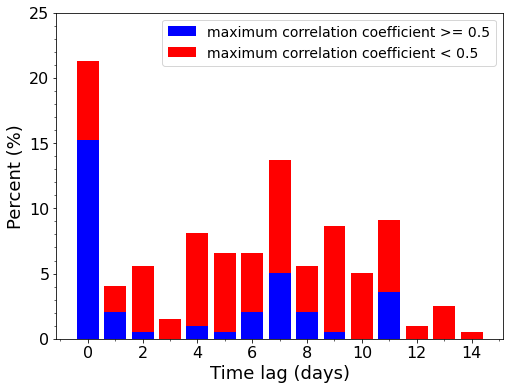

In [27]:
from matplotlib.ticker import MultipleLocator
fig, ax = plt.subplots(figsize=(8, 6))

p1=plt.bar(aa, x1, color = 'b',label = 'maximum correlation coefficient >= 0.5')
p2=plt.bar(aa, x2, bottom = x1,color = 'r',label = 'maximum correlation coefficient < 0.5')
plt.xlabel("Time lag (days)",fontsize = 18)
plt.ylabel("Percent (%)",fontsize = 18)
plt.legend(fontsize = 14)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.minorticks_on()
ax.xaxis.set_major_locator(MultipleLocator(2))  # major ticks every 100 (optional)
ax.xaxis.set_minor_locator(MultipleLocator(1))   # minor ticks every 10
ax.set_ylim([0,25])
# ax.tick_params(axis='x', which='minor', bottom=False)#disable x minor ticks
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) 
plt.savefig("Figure_WCPK_hist_tw15.jpg", bbox_inches = 'tight',dpi=600)